<a href="https://colab.research.google.com/github/Aayush360/Data_Science_Intern/blob/master/TimeSeries_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Multivariate TimeSeries Analysis using LSTM --- Implemntation from AIEngineering Youtube Channel 

In [2]:
## notebook imports

In [39]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.model_selection import train_test_split
import tensorflow as tf


mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']=False

In [4]:
# loading the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')


In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
## seems like there is no-missing value ,, we need to convert the date to datetime object

In [8]:
df.isna().sum() #checks for any missing values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
df_copy = df.copy() # let us first copy the data before making any changes

In [10]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [11]:
## set the index to datetime

df = df.set_index('date')

In [12]:
df.head() # now date is the index for this dataset

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0207dceb70>,
      dtype=object)

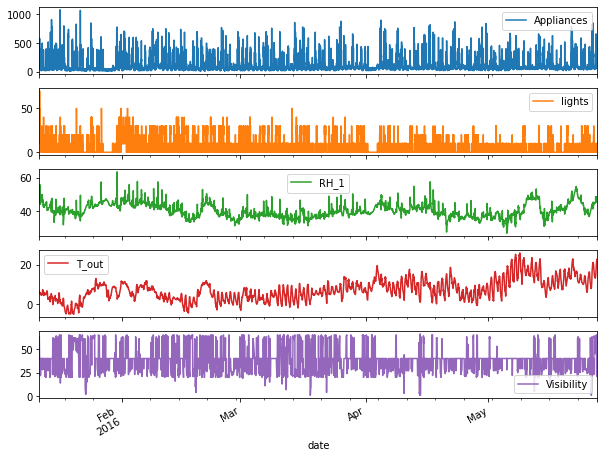

In [13]:
## let us plot the data slecting the features we are interested in 

df[['Appliances','lights','RH_1','T_out','Visibility']].plot(subplots=True)

In [14]:
## we can see some trend in the temperature ,, i.e being incresing gradually to the end though there are some fluctuation
##we can see the lights also having slight negative trend,, i.e decresing towards the end
## also there is vague but slight negeative trend in the Appliances,, though  there are some spikes randomly scatterd all over the chart
## the humidity seems to have some correlation with the temperature 

In [15]:
## let us select Appliances, RH_1, T_out and Visibility as our feature
## since we are interrested in finding the Appliances usage, it will be our Target 

In [16]:
df_input = df[['Appliances','RH_1','T_out','Visibility']]
df_input.head()

,Appliances,RH_1,T_out,Visibility
date,,,,
2016-01-11 17:00:00,60,47.596667,6.600000,63.000000
2016-01-11 17:10:00,60,46.693333,6.483333,59.166667
2016-01-11 17:20:00,50,46.300000,6.366667,55.333333
2016-01-11 17:30:00,50,46.066667,6.250000,51.500000
2016-01-11 17:40:00,60,46.333333,6.133333,47.666667


In [17]:
df_input.describe()

,Appliances,RH_1,T_out,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,40.259739,7.411665,38.330834
std,102.524891,3.979299,5.317409,11.794719
min,10.000000,27.023333,-5.000000,1.000000
25%,50.000000,37.333333,3.666667,29.000000
50%,60.000000,39.656667,6.916667,40.000000
75%,100.000000,43.066667,10.408333,40.000000
max,1080.000000,63.360000,26.100000,66.000000


In [18]:
## for the Appliance column the mean value is 97 and median is 60,, this seems to be positively skewed data 
## the maximum value of 1080 sugest there is presence of outliers in the data,, we should handle this outlier either using a cutoff point
##or transforming the data

In [19]:
# plt.hist(df_input[['Appliances']])

In [20]:
## let us use a cutoff point point to see how many data are above this value

df_input.query('Appliances>500')

,Appliances,RH_1,T_out,Visibility
date,,,,
2016-01-11 18:50:00,580,46.396667,5.983333,40.000000
2016-01-13 21:20:00,520,41.530000,2.900000,36.333333
2016-01-14 10:20:00,550,43.433333,2.033333,40.000000
2016-01-14 10:30:00,690,43.766667,2.100000,40.000000
2016-01-14 10:40:00,620,43.693333,2.166667,40.000000
...,...,...,...,...
2016-05-26 17:20:00,600,44.066667,20.833333,40.000000
2016-05-26 17:30:00,520,43.366667,20.900000,40.000000
2016-05-27 09:40:00,580,47.226667,15.900000,61.000000


In [21]:
## there are 288 rows that lies above 288 ,, let us handle these using MinmaxScaler,, 
## Standard scaler will not change the distribution nor does it handles the outliers thus we go for MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaled_input_df = scaler.fit_transform(df_input)

In [25]:
scaled_input_df ## all values are scaled between 0 and 1 

array([[0.04672897, 0.56618659, 0.37299035, 0.95384615],
       [0.04672897, 0.54132648, 0.36923901, 0.89487179],
       [0.03738318, 0.53050179, 0.36548767, 0.83589744],
       ...,
       [0.24299065, 0.53866618, 0.88317256, 0.37435897],
       [0.38317757, 0.54949087, 0.87888532, 0.38717949],
       [0.39252336, 0.53875791, 0.87459807, 0.4       ]])

In [27]:
## let us make features an terget to train the data

features = scaled_input_df
target = scaled_input_df[:,0]

In [28]:
## split the data 60-20-20

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,shuffle=False)


In [32]:
## let us make a validation dataset_ out of trainig data
val_size = int((X_train.shape[0])*0.2)
train_size = X_train.shape[0] -val_size

In [34]:
X_train = X_train[:train_size,:]
y_train = y_train[:train_size]

In [50]:
X_val = X_train[-val_size:,:]
y_val = y_train[-val_size:]

In [38]:
720/(6*24) # 6 data points makes 1 hour (10 min each and) to know the date we divide by 24 

5.0

In [41]:
## making a generator for train test and validation set

window_length = 720  #window of 5 days,,, we are taking 5 days into account to predict the next day
batch_size=32
num_features = 4

train_generator = TimeseriesGenerator(X_train,y_train,length=window_length, sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test,y_test,length=window_length, sampling_rate=1,batch_size=batch_size)

In [51]:
val_generator = TimeseriesGenerator(X_val,y_val,length=window_length, sampling_rate=1,batch_size=batch_size)


In [43]:
train_generator[0]

## contains 32 values,, batches
## each takes into account 5 days of values and target as the 6th day Appliance value

(array([[[0.04672897, 0.56618659, 0.37299035, 0.95384615],
         [0.04672897, 0.54132648, 0.36923901, 0.89487179],
         [0.03738318, 0.53050179, 0.36548767, 0.83589744],
         ...,
         [0.06542056, 0.31584258, 0.25241158, 0.79230769],
         [0.05607477, 0.31309054, 0.23901393, 0.72820513],
         [0.06542056, 0.31107238, 0.22561629, 0.66410256]],
 
        [[0.04672897, 0.54132648, 0.36923901, 0.89487179],
         [0.03738318, 0.53050179, 0.36548767, 0.83589744],
         [0.03738318, 0.52408036, 0.36173633, 0.77692308],
         ...,
         [0.05607477, 0.31309054, 0.23901393, 0.72820513],
         [0.06542056, 0.31107238, 0.22561629, 0.66410256],
         [0.06542056, 0.30923768, 0.21221865, 0.6       ]],
 
        [[0.03738318, 0.53050179, 0.36548767, 0.83589744],
         [0.03738318, 0.52408036, 0.36173633, 0.77692308],
         [0.04672897, 0.53141914, 0.35798499, 0.71794872],
         ...,
         [0.06542056, 0.31107238, 0.22561629, 0.66410256],
        

In [44]:
### Creating the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(window_length,num_features),return_sequences=True)) # since we want full sequence not just output from last sequence
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1)) # since output is a single number instead of the vector




In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [48]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=2,mode='min') # if val loss does not improve for 2 consecutive iteration stop the trianing
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])     

history = model.fit_generator(train_generator,epochs=50,
                              validation_data = test_generator,
                              shuffle=False,
                              callbacks=[early_stop])                 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
373/373 [==============================] - 42s 87ms/step - loss: 0.0123 - mean_absolute_error: 0.0646 - val_loss: 0.0073 - val_mean_absolute_error: 0.0393
Epoch 2/50
373/373 [==============================] - 32s 85ms/step - loss: 0.0099 - mean_absolute_error: 0.0557 - val_loss: 0.0056 - val_mean_absolute_error: 0.0343
Epoch 3/50
373/373 [==============================] - 32s 86ms/step - loss: 0.0078 - mean_absolute_error: 0.0460 - val_loss: 0.0043 - val_mean_absolute_error: 0.0296
Epoch 4/50
373/373 [==============================] - 32s 85ms/step - loss: 0.0055 - mean_absolute_error: 0.0380 - val_loss: 0.0036 - val_mean_absolute_error: 0.0261
Epoch 5/50
373/373 [==============================] - 32s 85ms/step - loss: 0.0051 - mean_absolute_error: 0.0355 - val_loss: 0.0037 - val_mean_absolute_error: 0.0271
Epoch 6/50
373/373 [==============================] - 32s 85ms/step - loss: 0.0049 - mean_absolute_error: 0.0351 - val_loss: 0.0035 - val_mean_absolute_error: 0.0287
Epoc

In [52]:
model.evaluate_generator(val_generator,verbose=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0037064107600599527, 0.027431339025497437]

In [53]:
predictions = model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [54]:
predictions.shape #720 less than the y_test,, because it takes initial 720 records and predicts the next one

(3227, 1)

In [55]:
y_test.shape

(3947,)

In [58]:
X_test

array([[0.3364486 , 0.30923768, 0.34297964, 0.6       ],
       [0.54205607, 0.3055683 , 0.34726688, 0.6       ],
       [0.28971963, 0.30455921, 0.35155413, 0.6       ],
       ...,
       [0.24299065, 0.53866618, 0.88317256, 0.37435897],
       [0.38317757, 0.54949087, 0.87888532, 0.38717949],
       [0.39252336, 0.53875791, 0.87459807, 0.4       ]])

In [62]:
len(X_test[:,1:][window_length:]) # takes features except Appliances

3227

In [64]:
df_input.columns

Index(['Appliances', 'RH_1', 'T_out', 'Visibility'], dtype='object')

In [66]:
## let us concat this result with prediction

df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(X_test[:,1:][window_length:]) ], axis=1 )

In [71]:
## since the out is scales as well we need to reverse the effect

rev = scaler.inverse_transform(df_pred)

In [72]:
rev

array([[ 83.30465131,  34.6       ,   9.1       ,  40.        ],
       [105.92715569,  33.66666667,   9.65      ,  40.        ],
       [130.21399185,  33.73333333,  10.2       ,  40.        ],
       ...,
       [ 82.0620846 ,  46.59666667,  22.46666667,  25.33333333],
       [263.5650669 ,  46.99      ,  22.33333333,  26.16666667],
       [285.18569887,  46.6       ,  22.2       ,  27.        ]])

In [75]:
df_final = df_input[-len(predictions):]
df_final.shape

(3227, 4)

In [76]:
df_final['Predicted_Appliance'] = rev[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_final

,Appliances,RH_1,T_out,Visibility,Predicted_Appliance
date,,,,,
2016-05-05 08:20:00,90,34.600000,9.100000,40.000000,83.304651
2016-05-05 08:30:00,120,33.666667,9.650000,40.000000,105.927156
2016-05-05 08:40:00,390,33.733333,10.200000,40.000000,130.213992
2016-05-05 08:50:00,240,34.072500,10.750000,40.000000,380.415174
2016-05-05 09:00:00,120,33.630000,11.300000,40.000000,173.391240
...,...,...,...,...,...
2016-05-27 17:20:00,100,46.560000,22.733333,23.666667,87.944258
2016-05-27 17:30:00,90,46.500000,22.600000,24.500000,98.117435
2016-05-27 17:40:00,270,46.596667,22.466667,25.333333,82.062085


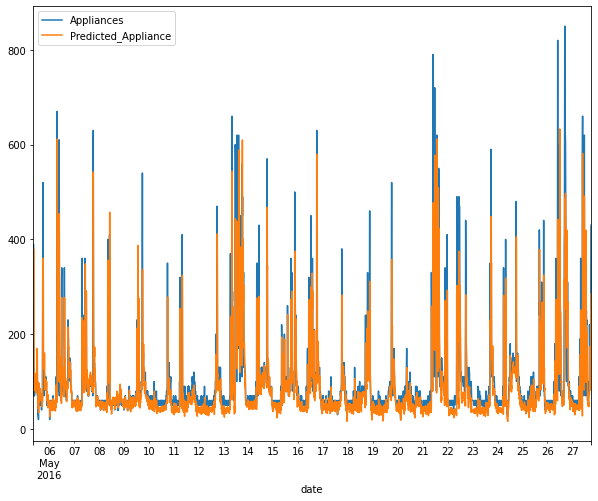

In [78]:
## let us see how well our model predicted by visulizing 

df_final[['Appliances','Predicted_Appliance']].plot()

In [79]:
## pretty good estimation
## but failed to capture the extreme points in the original data
## may be we should include those feauters which accounted for these higher spikes and retrain the model to get even better estimaiton
## altogther LSTM did a good job capturing the trend in the data